[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nepslor/B5203E-TSAF/blob/main/W3/outlier_detection_in_TS.ipynb)

# Outlier detection for time series
In this groupwork we will try to remove pointwise outliers from three synthetic datasets using saliency scores $s_t$.

One way to produce saliency scores is to use a forecaster:
$$\hat{x}_{t+1} = f(x_{t|T})$$

then, for example, $s$ could be defined as
$$s_{t+1} = \begin{cases}
x_{t+1}-q_{0.99}   \quad \text{if} \quad x_{t+1}>q_{0.99}\\
q_{0.01} - x_{t+1} \quad \text{if} \quad x_{t+1}<q_{0.01}
\end{cases}$$

where $q_{0.99}$ and $q_{0.01}$ are the 99% and 1%, theoretic or empirical, quantiles of the predictions.

Feel free to use any other methods!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/nepslor/teaching/main/TimeSeriesForecasting/data/outliers.csv', index_col=0)

[<Axes: >, <Axes: >, <Axes: >]

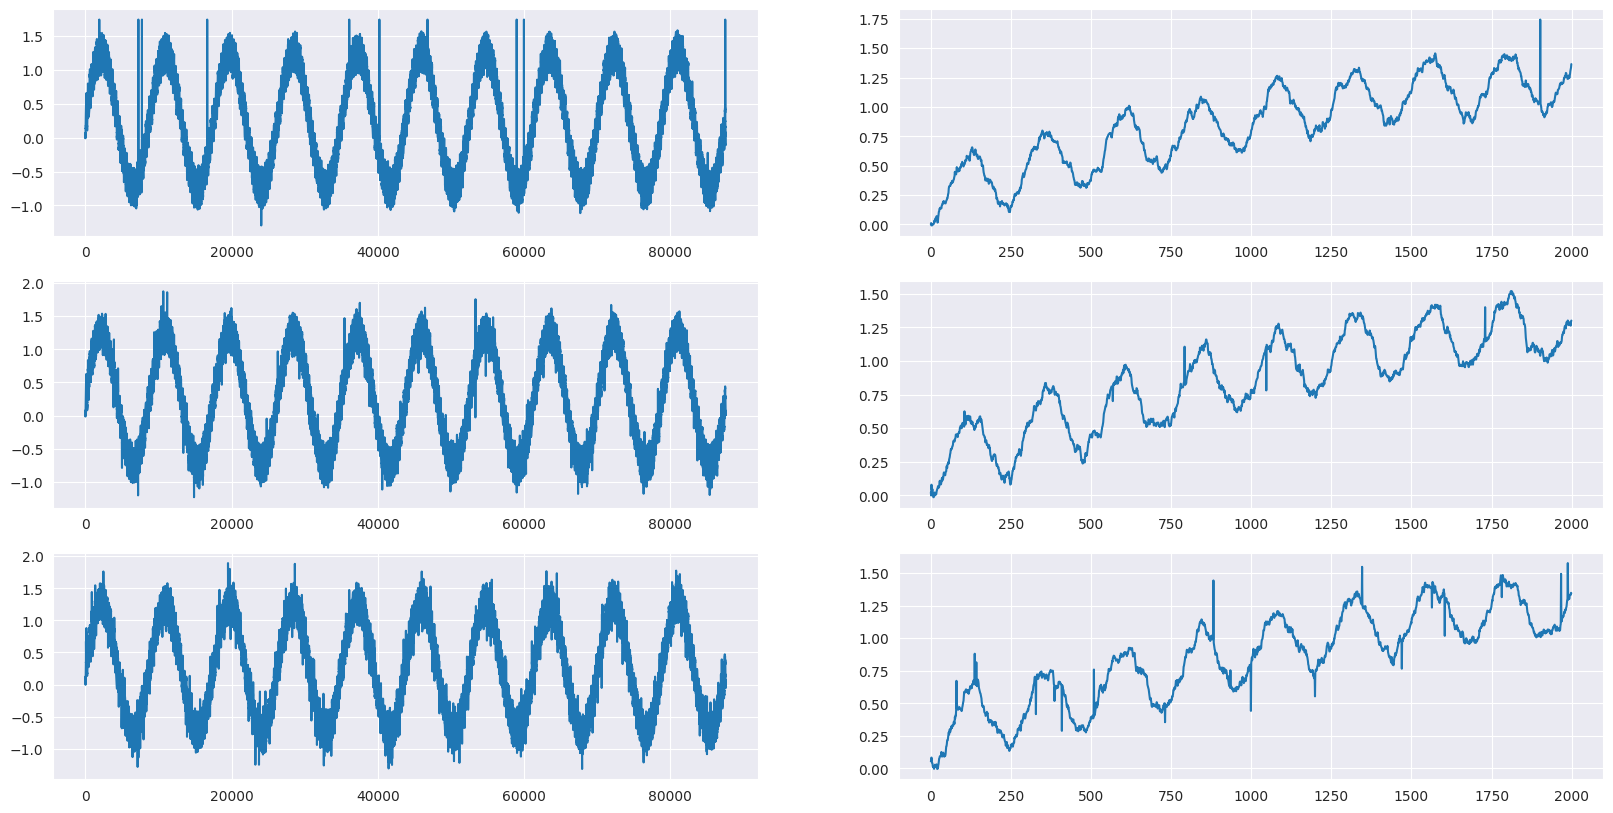

In [2]:
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
[data[d].plot(ax=a) for d, a in zip(data, ax[:, 0])]
[data[d].iloc[:2000].plot(ax=a) for d, a in zip(data, ax[:, 1])]


The three datasets present the following characteristics:
1. Mostly out-of-distributions outliers: these outliers are higher or lower than the maximum observed values, and are easy to find. Watch out! Some other suspicious points could still be present!
2. Few local outliers. These cannot be filter out using a filter on the entire distribution, a sliding window method should be used.
3. A lot local outliers. Some methods could fail to spot those, since more than one could be present in the sliding window. Possibly an iterative method (in which outliers are spotted and replaced sequentially) could help.



# ❓ Your turn!
For this challenge you can reuse any technique or code we have seen in the previous exercises. The final evaluation metric is the $F1$ score, defined as:
$$F1 = 2/(1/precision + 1/recall)$$
Where
$$precision = TP/\hat{P}$$
$$recall = TP/P$$
That is, precision and recall are the ratio of points labeled as positive and being indeed positive (true positive) over the number of predicted positive points or effective positive points.
